In [ ]:
## Q. 1- In Sales of cars.zip file, three years car sales data is given. Predict the sales of cars for next 6 months.

#### For forecasting, I have used different forecasting models and the model which gives least RMSE, that one I finalized for forecasting.

In [15]:
## Imported Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv("D:\\DATA_science\\Nanobi_Analytics\\sales of cars.csv", header = 0, index_col = 0, parse_dates = True)

In [11]:
data.head()

,Sales_of_Cars
Month,
2018-01-01,266.0
2018-02-01,145.9
2018-03-01,183.1
2018-04-01,119.3
2018-05-01,180.3


In [12]:
data.shape

(36, 1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2018-01-01 to 2020-12-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales_of_Cars  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [14]:
data.isna().sum()  ## NO null values in data

Sales_of_Cars    0
dtype: int64

In [16]:
data.describe()  ## Standard deviation is high.

,Sales_of_Cars
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


### Visualizations

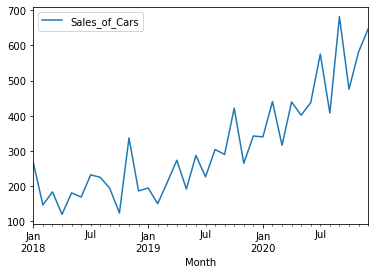

In [17]:
data.plot()
plt.show()    ## Overall trend looks like polynomial.

<AxesSubplot:xlabel='Month'>

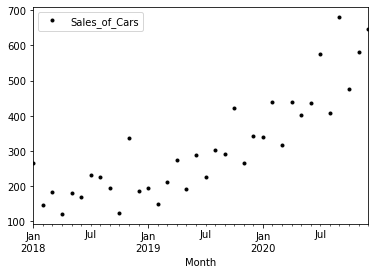

In [18]:
data.plot(style='k.')

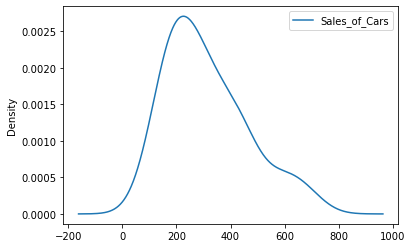

In [19]:
data.plot(kind = 'kde')
plt.show()

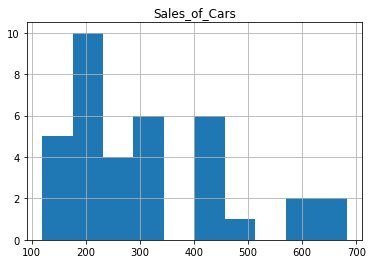

In [20]:
data.hist()
plt.show()

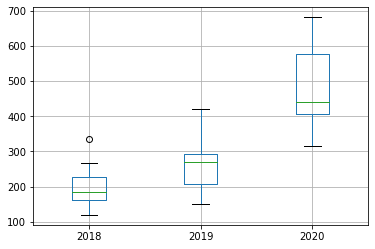

In [22]:
data = pd.read_csv("D:\\DATA_science\\Nanobi_Analytics\\sales of cars.csv", header = 0, index_col = 0,
                   parse_dates = True, squeeze=True)

from pandas import Grouper
groups = data.groupby(Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.boxplot()
plt.show()                                ### There is one outlier, we keep it as it is because our data is small

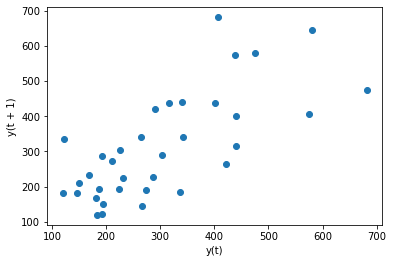

In [23]:
pd.plotting.lag_plot(data)
plt.show()                       ## looks like there is a positive relationship with its lag.

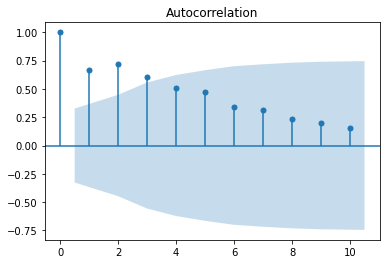

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data,lags=10)
plt.show()                           ##  4 lag values are above the 95% confidence interval.

In [27]:
data = pd.read_csv("D:\\DATA_science\\Nanobi_Analytics\\sales of cars.csv", header = 0, index_col = 0,
                   parse_dates = True)
data.head()

,Sales_of_Cars
Month,
2018-01-01,266.0
2018-02-01,145.9
2018-03-01,183.1
2018-04-01,119.3
2018-05-01,180.3


## Dcomposing time series

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
result = seasonal_decompose(data['Sales_of_Cars'], model = 'additive')

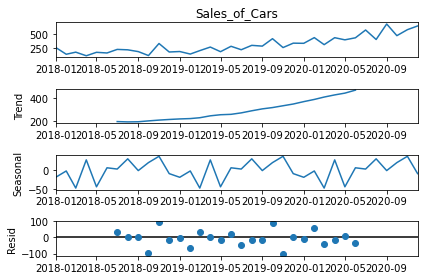

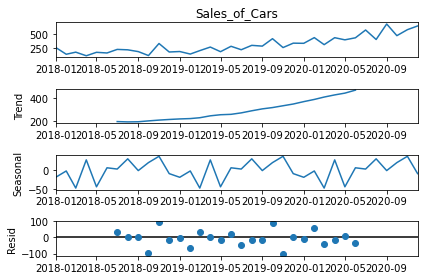

In [31]:
result.plot()

In [32]:
result1 = seasonal_decompose(data['Sales_of_Cars'], model = 'multiplicative')

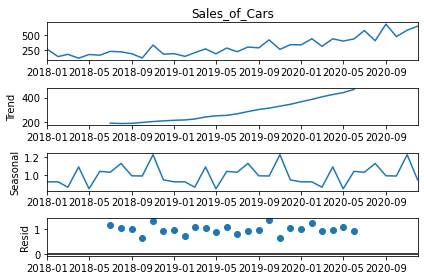

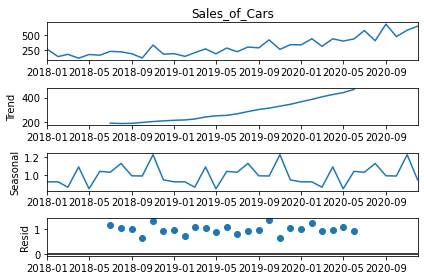

In [33]:
result1.plot()

### Train-Test Split

In [60]:
train_size = int(data.shape[0]*0.8)   ## 80% is for train and 20% is for test. In all models I have used this train size
train_size

28

In [35]:
train = data[0:train_size]

In [37]:
test = data[train_size:]

In [38]:
print(train.shape)
print(train.head())

(28, 1)
            Sales_of_Cars
Month                    
2018-01-01          266.0
2018-02-01          145.9
2018-03-01          183.1
2018-04-01          119.3
2018-05-01          180.3


In [40]:
print(test.shape)
print(test.head(8))

(8, 1)
            Sales_of_Cars
Month                    
2020-05-01          401.3
2020-06-01          437.4
2020-07-01          575.5
2020-08-01          407.6
2020-09-01          682.0
2020-10-01          475.3
2020-11-01          581.3
2020-12-01          646.9


### Persistance Model

In [41]:
data = pd.read_csv("D:\\DATA_science\\Nanobi_Analytics\\sales of cars.csv", header = 0, parse_dates = True)
data.head()

,Month,Sales_of_Cars
0,01-2018,266.0
1,02-2018,145.9
2,03-2018,183.1
3,04-2018,119.3
4,05-2018,180.3


In [42]:
data['t'] = data['Sales_of_Cars'].shift(1)

In [43]:
data.head()

,Month,Sales_of_Cars,t
0,01-2018,266.0,NaN
1,02-2018,145.9,266.0
2,03-2018,183.1,145.9
3,04-2018,119.3,183.1
4,05-2018,180.3,119.3


In [44]:
train, test = data[1:train_size], data[train_size:]

In [45]:
train.head()

,Month,Sales_of_Cars,t
1,02-2018,145.9,266.0
2,03-2018,183.1,145.9
3,04-2018,119.3,183.1
4,05-2018,180.3,119.3
5,06-2018,168.5,180.3


In [46]:
train_x, train_y = train['t'], train['Sales_of_Cars']
test_x, test_y = test['t'], test['Sales_of_Cars']

#### walk-forward validation

In [47]:
predictions = test_x.copy()

In [48]:
print(predictions)
print(test_y)

28    439.3
29    401.3
30    437.4
31    575.5
32    407.6
33    682.0
34    475.3
35    581.3
Name: t, dtype: float64
28    401.3
29    437.4
30    575.5
31    407.6
32    682.0
33    475.3
34    581.3
35    646.9
Name: Sales_of_Cars, dtype: float64


In [49]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(test_y, predictions)
RMSE = np.sqrt(mse)
RMSE

151.4797181143403

In [50]:
from matplotlib import pyplot as plt

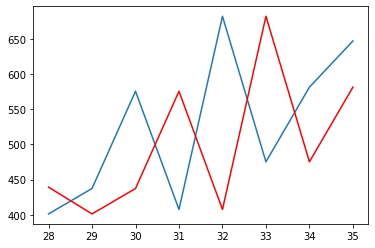

In [51]:
plt.plot(test_y)
plt.plot(predictions, color = 'red')
plt.show()

### Autoregression Model

In [202]:
data = pd.read_csv("D:\\DATA_science\\Nanobi_Analytics\\sales of cars.csv", header = 0, index_col = 0,
                   parse_dates = True)
data.head()

,Sales_of_Cars
Month,
2018-01-01,266.0
2018-02-01,145.9
2018-03-01,183.1
2018-04-01,119.3
2018-05-01,180.3


In [203]:
train, test = data.Sales_of_Cars[:train_size], data.Sales_of_Cars[train_size:]

In [191]:
train.shape

(28,)

In [192]:
test.shape

(8,)

In [193]:
data.shape

(36, 1)

In [194]:
from statsmodels.tsa.ar_model import AR

In [195]:
model = AR(data)
model_fit = model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:

#### Number of lag variables

In [159]:
model_fit.k_ar    #  9 lag values are important

9

#### Coefficients of lag Variables

In [160]:
model_fit.params

const               3.861355
L1.Sales_of_Cars   -0.219978
L2.Sales_of_Cars    0.261886
L3.Sales_of_Cars    0.229315
L4.Sales_of_Cars    0.758578
L5.Sales_of_Cars    0.377529
L6.Sales_of_Cars    0.133204
L7.Sales_of_Cars   -0.045283
L8.Sales_of_Cars   -0.227360
L9.Sales_of_Cars   -0.181756
dtype: float64

In [174]:
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

In [162]:
predictions

2020-05-01    372.910496
2020-06-01    456.713022
2020-07-01    400.675110
2020-08-01    490.727598
2020-09-01    436.991750
2020-10-01    497.704950
2020-11-01    475.628025
2020-12-01    539.959441
Freq: MS, dtype: float64

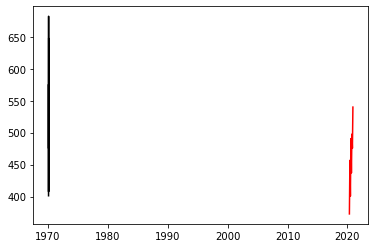

In [163]:
plt.plot(test_y, color = 'black')
plt.plot(predictions, color = 'red')
plt.show()

#### Walk Forward Validation

In [173]:
data = train;
predict = [];
for p in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(data)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, p)
    data = pd.Series(data)

372.9104955157961
458.2774803479582
417.59001978916103
474.30093611662693
563.4713359608684
470.7796435197618
753.0945063758921
672.4027002529601


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [165]:
predict

[372.9104955157961,
 458.2774803479582,
 417.59001978916103,
 474.30093611662693,
 563.4713359608684,
 470.7796435197618,
 753.0945063758921,
 672.4027002529601]

In [166]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(test.values, predict)
RMSE = np.sqrt(mse)
RMSE

96.73393138029338

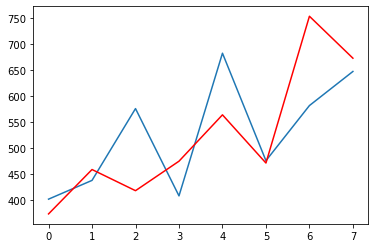

In [167]:
plt.plot(test.values)
plt.plot(predict, color = 'red')

In [199]:
data.tail()

,Sales_of_Cars
Month,
2020-08-01,407.6
2020-09-01,682.0
2020-10-01,475.3
2020-11-01,581.3
2020-12-01,646.9


In [206]:
data;

## Forecast by using Autoregression

In [178]:

from statsmodels.tsa.arima_model import ARIMA

In [205]:
model = ARIMA(data['Sales_of_Cars'], order = (1, 0, 0))

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [182]:
model_fit = model.fit()

In [184]:
model_fit.forecast(6)

(array([568.77556245, 510.10983867, 466.05618204, 432.97511634,
        408.13366181, 389.47955108]),
 array([102.23498493, 127.85059652, 140.24701551, 146.77632179,
        150.33314937, 152.30219023]),
 array([[368.39867402, 769.15245088],
        [259.52727409, 760.69240326],
        [191.17708271, 740.93528138],
        [145.29881185, 720.65142083],
        [113.48610336, 702.78122027],
        [ 90.97274346, 687.98635869]]))

### Moving Average model

In [88]:
data = pd.read_csv("D:\\DATA_science\\Nanobi_Analytics\\sales of cars.csv", header = 0, index_col = 0,
                   parse_dates = True)
data.head()

,Sales_of_Cars
Month,
2018-01-01,266.0
2018-02-01,145.9
2018-03-01,183.1
2018-04-01,119.3
2018-05-01,180.3


In [89]:
data['p'] = data['Sales_of_Cars'].shift(1)

In [90]:
data['Resid'] = data['Sales_of_Cars'] - data['p']

In [91]:
data.head()

,Sales_of_Cars,p,Resid
Month,,,
2018-01-01,266.0,NaN,NaN
2018-02-01,145.9,266.0,-120.1
2018-03-01,183.1,145.9,37.2
2018-04-01,119.3,183.1,-63.8
2018-05-01,180.3,119.3,61.0


In [93]:
train, test = data.Resid[1:train_size], data.Resid[train_size:]

In [94]:
from statsmodels.tsa.ar_model import AR

In [95]:
model = AR(train)
model_fit = model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:

In [96]:
model_fit.k_ar

9

In [97]:
model_fit.params

const       32.805460
L1.Resid    -1.108567
L2.Resid    -0.623163
L3.Resid    -0.360551
L4.Resid     0.252909
L5.Resid     0.335512
L6.Resid     0.090581
L7.Resid    -0.092910
L8.Resid    -0.446502
L9.Resid    -0.413961
dtype: float64

In [98]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [101]:
predictions = data.p[data.shape[0] - 8:] + pred_resid

In [102]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(test_y, predictions)
RMSE = np.sqrt(mse)
RMSE

208.33169778222552

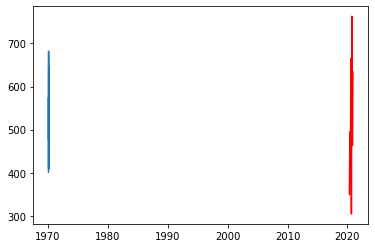

In [103]:
plt.plot(test_y)
plt.plot(predictions, color = 'red')

## Arima Model

In [104]:
data = pd.read_csv("D:\\DATA_science\\Nanobi_Analytics\\sales of cars.csv", header = 0, index_col = 0,
                   parse_dates = True)
data.head()

,Sales_of_Cars
Month,
2018-01-01,266.0
2018-02-01,145.9
2018-03-01,183.1
2018-04-01,119.3
2018-05-01,180.3


<AxesSubplot:xlabel='Month'>

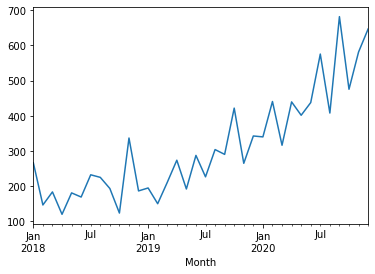

In [105]:
data['Sales_of_Cars'].plot()

###### Trend is Polynomial
###### D = 2

### Autocorrelation Parameters

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

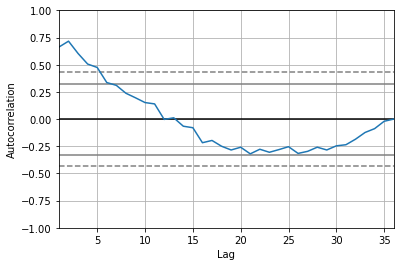

In [106]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Sales_of_Cars'])

##### P = 5

### Partial Autocorrelation PLot


In [108]:
from statsmodels.graphics.tsaplots import plot_pacf

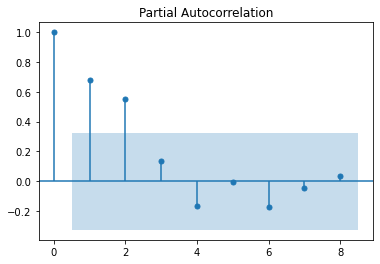

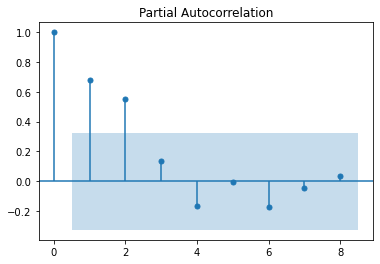

In [110]:
plot_pacf(data['Sales_of_Cars'], lags = 8)

##### q = 3

In [111]:
from statsmodels.tsa.arima_model import ARIMA

In [112]:
model = ARIMA(data['Sales_of_Cars'], order = (5,2,3))

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [113]:
model_fit = model.fit()

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWar

In [114]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D2.Sales_of_Cars   No. Observations:                   34
Model:                 ARIMA(5, 2, 3)   Log Likelihood                -189.951
Method:                       css-mle   S.D. of innovations             54.585
Date:                Wed, 02 Jun 2021   AIC                            399.903
Time:                        17:02:45   BIC                            415.166
Sample:                    03-01-2018   HQIC                           405.108
                         - 12-01-2020                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.9513      2.042      0.466      0.641      -3.052       4.954
ar.L1.D2.Sales_of_Cars    -1.8511      0.184    -10.062      0.000      -2.212      -1.491
ar.L2.D2.Sales_of_Cars    -1.6530      0.320     -5.159      0.000      -2.281      -1.025
ar.L3.D2.Sales_of_Cars    -1.6153      0.329     -4.917      0.000      -2.259      -0.971
ar.L4.D2.Sales_of_Cars    -1.3482      0.329     -4.104      0.000      -1.992      -0.704
ar.L5.D2.Sales_of_Cars    -0.4731      0.192     -2.470      0.014      -0.849      -0.098
ma.L1.D2.Sales_of_Cars    -0.1567      0.146     -1.076      0.282      -0.442       0.129
ma.L2.D2.Sales_of_Cars    -0.1564      0.143     -1.095      0.274      -0.436       0.124
ma.L3.D2.Sales_of_Cars     0.9998      0.158      6.337      0.000       0.691       1.309
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2812           -1.0516j            1.0886           -0.2084
AR.2            0.2812           +1.0516j            1.0886            0.2084
AR.3           -1.1222           -0.5177j            1.2358           -0.4312
AR.4           -1.1222           +0.5177j            1.2358            0.4312
AR.5           -1.1678           -0.0000j            1.1678           -0.5000
MA.1            0.5783           -0.8158j            1.0000           -0.1519
MA.2            0.5783           +0.8158j            1.0000            0.1519
MA.3           -1.0002           -0.0000j            1.0002           -0.5000
-----------------------------------------------------------------------------
"""

In [115]:
residuals = model_fit.resid

<AxesSubplot:xlabel='Month'>

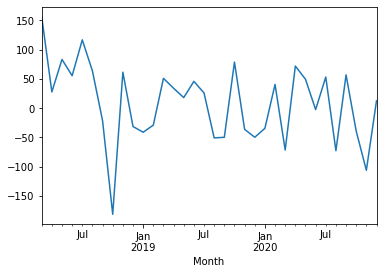

In [116]:
residuals.plot()

In [117]:
residuals.describe()

count     34.000000
mean       8.369948
std       68.074445
min     -181.393203
25%      -38.504848
50%       21.985277
75%       54.875082
max      156.348720
dtype: float64

In [120]:
model_fit.forecast(6)    ## Forecasted for next 6 values by using Arima

(array([578.86534108, 658.67889056, 577.07004782, 679.81701804,
        676.15263788, 696.91168562]),
 array([ 54.58487961,  54.58657331,  73.1359773 ,  90.0966397 ,
        115.01329744, 146.74518676]),
 array([[471.88094295, 685.84973922],
        [551.69117283, 765.66660828],
        [433.72616634, 720.4139293 ],
        [503.23084911, 856.40318698],
        [450.73071715, 901.57455861],
        [409.29640466, 984.52696657]]))

### Walk Forward Arima

In [143]:
data = pd.read_csv("D:\\DATA_science\\Nanobi_Analytics\\sales of cars.csv", header = 0, index_col = 0,
                   parse_dates = True)
data.head()

,Sales_of_Cars
Month,
2018-01-01,266.0
2018-02-01,145.9
2018-03-01,183.1
2018-04-01,119.3
2018-05-01,180.3


In [144]:
train_size = int(data.shape[0]*0.8)

In [145]:
train, test = data.Sales_of_Cars[0:train_size], data.Sales_of_Cars[train_size:]

In [146]:
test.shape

(8,)

In [147]:
data = train
predict = []
for p in test:
    model = ARIMA(data, order=(9, 1, 0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data, p)
    data = pd.Series(data)

C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

341.64559109200815
425.54301481218016
401.9845591362974
481.806187612493
511.8769201306606


C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


434.5624965660133
710.7878496569901
590.0738480411824


In [148]:
predict

[341.64559109200815,
 425.54301481218016,
 401.9845591362974,
 481.806187612493,
 511.8769201306606,
 434.5624965660133,
 710.7878496569901,
 590.0738480411824]

In [149]:
from sklearn.metrics import mean_squared_error as mse
mse = mse(test.values, predict)
RMSE = np.sqrt(mse)
RMSE

106.01363375971584

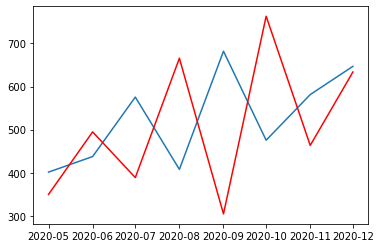

In [150]:
plt.plot(test)
plt.plot(predictions, color = 'red')

### We are getting least RMSE value in Autoregressive Model for Walk Forward. Therefore we use it for forecasting.
### RMSE = 96.73

In [ ]:
### I have predicted for next 6 months in ARIMA Model.